# Peer-graded Assignment: Week 4: NLP Disaster Tweets Kaggle Mini-Project

**Problem Description**

This project addresses a natural language processing (NLP) classification task using tweets related to disasters. The objective is to develop a model that can determine whether a given tweet is about a real disaster or not. Accurate classification has practical value in areas such as real-time disaster tracking, emergency response systems, and social media analysis.

The dataset used is the [NLP Disaster Tweets](https://www.kaggle.com/competitions/nlp-getting-started) dataset from Kaggle. It consists of tweets that are labeled to indicate whether they are disaster-related (1) or not (0). The dataset includes:

- `text`: The content of the tweet  
- `keyword`: A keyword from the tweet (optional)  
- `location`: The location from which the tweet was posted (optional)  
- `target`: A binary label where `1` means the tweet is about a disaster, and `0` means it is not  

The data is structured in a tabular format, with rows representing individual tweets and columns providing metadata. The primary feature used in the classification model is the `text` column, as it contains the core content used for prediction.

**Evaluation**

Model performance is evaluated using the **F1 score**, which balances precision and recall. The F1 score is defined as:

F1 = 2 * (precision * recall) / (precision + recall)

Where:

precision = TP / (TP + FP)  
recall = TP / (TP + FN)

- **True Positive (TP)**: Your model predicts 1, and the actual label is also 1 — a correct positive prediction.  
- **False Positive (FP)**: Your model predicts 1, but the actual label is 0 — an incorrect positive prediction.  
- **False Negative (FN)**: Your model predicts 0, but the actual label is 1 — an incorrect negative prediction.  

**Submission File Format**

For each tweet in the test set, your submission should predict `1` if the tweet is about a real disaster, or `0` otherwise. The file must include a header and follow the format below:



## Load and Preview the Dataset
In this section, we load the dataset and preview the structure using `.head()`. This helps understand what data we’re working with.


In [1]:
import pandas as pd

# Load the training dataset
train_data = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')

# Display the first few rows to inspect the dataset
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1



## Explore the Target Distribution
We'll visualize the class distribution to understand any class imbalance between disaster (1) and non-disaster (0) tweets.


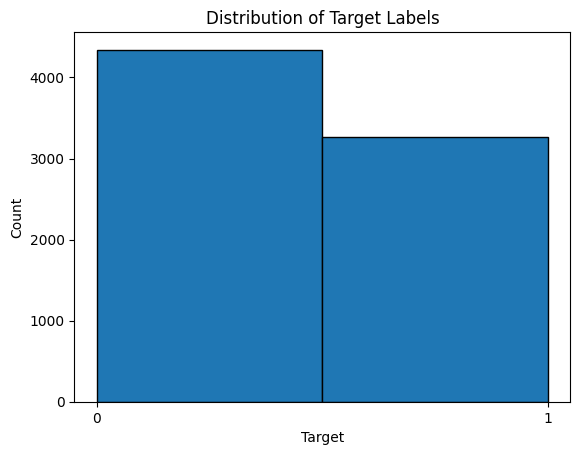

In [2]:
import matplotlib.pyplot as plt

# Plot a histogram of the target variable
plt.hist(train_data['target'], bins=2, edgecolor='black')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Labels')
plt.xticks([0, 1])
plt.show()

## Word Cloud for Disaster Tweets
To get an intuition of common words in disaster-related tweets, we generate a word cloud.

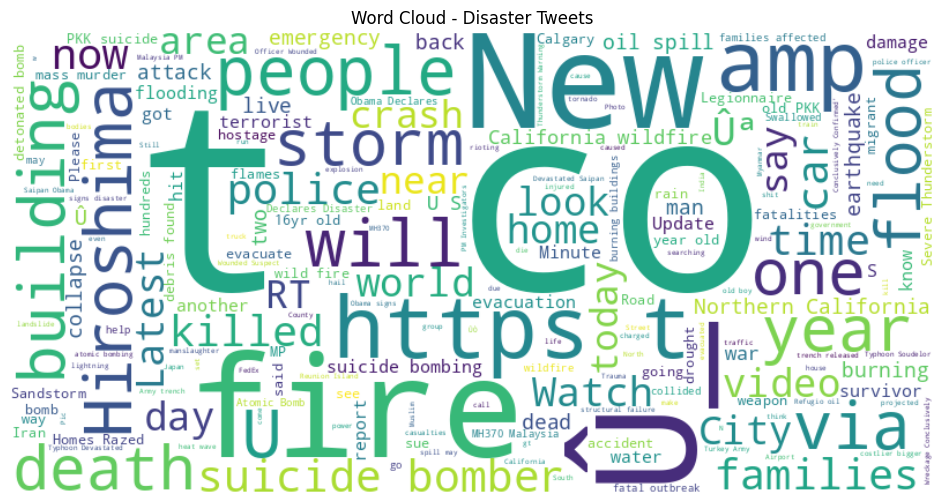

In [3]:
from wordcloud import WordCloud

# Filter disaster tweets (target == 1)
disaster_tweets = train_data[train_data['target'] == 1]['text']

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(disaster_tweets))

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Disaster Tweets')
plt.show()

## Keyword and Location Distribution
We'll examine the distribution of keywords and top locations to identify any dominant features.

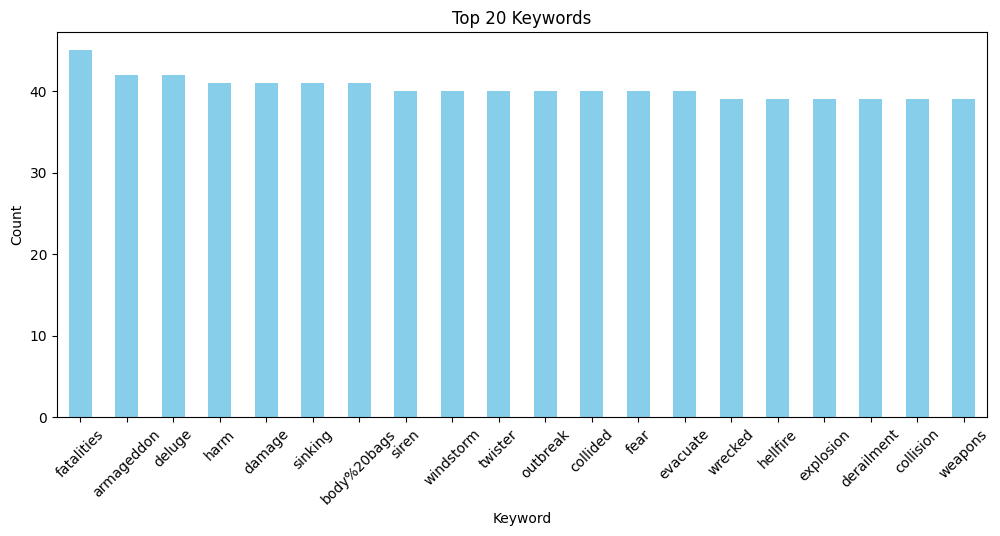

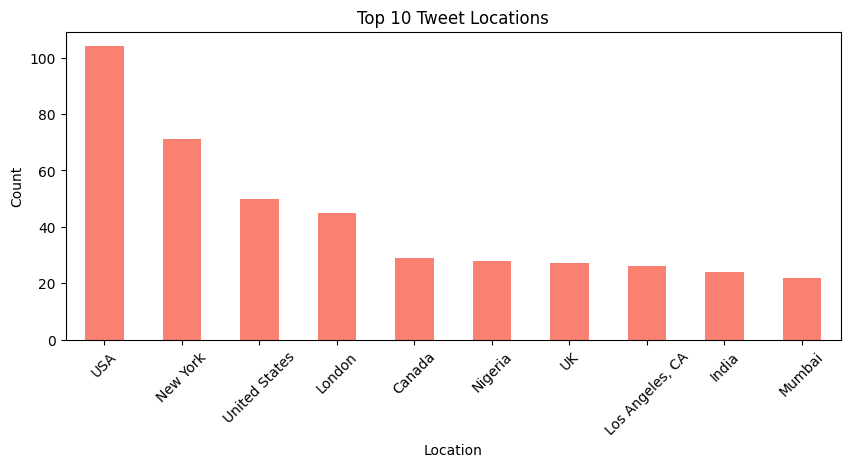

In [4]:
# Plot bar chart of most frequent keywords
train_data['keyword'].value_counts().head(20).plot(kind='bar', figsize=(12, 5), color='skyblue')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.title('Top 20 Keywords')
plt.xticks(rotation=45)
plt.show()

# Plot bar chart of top 10 most frequent locations
train_data['location'].value_counts().head(10).plot(kind='bar', figsize=(10, 4), color='salmon')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Tweet Locations')
plt.xticks(rotation=45)
plt.show()

## Data Cleaning
We check for and remove missing values in the dataset to avoid errors during preprocessing and model training.

In [5]:
# Display count of missing values per column
print("Missing values before cleaning:\n", train_data.isnull().sum())

# Drop rows with any missing values
train_data = train_data.dropna()

# Confirm all missing values are removed
print('\nTotal remaining missing values:', train_data.isnull().sum().sum())

Missing values before cleaning:
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Total remaining missing values: 0


## Text Preprocessing
In this step, we prepare the text for modeling. We:
 - Convert text to lowercase to ensure consistency.
 - Split the dataset into training and validation sets.
 - Tokenize the text (convert words to numeric indices).
 - Pad sequences to a fixed length to ensure uniform input size.

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert all tweet text to lowercase for normalization
train_data['text'] = train_data['text'].str.lower()

# Split into training and validation sets (80/20 split)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Initialize the tokenizer and fit on training text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])

# Vocabulary size (+1 for padding index)
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)

# Set maximum sequence length for padding
max_sequence_length = 100

# Convert training and validation text to sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_data['text'])
val_sequences = tokenizer.texts_to_sequences(val_data['text'])

# Pad sequences so that all have the same length
train_padded_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post')
val_padded_sequences = pad_sequences(val_sequences, maxlen=max_sequence_length, padding='post')

# Display example padded sequence
print("Example sequence:", train_padded_sequences[0])

2025-06-22 13:14:03.669622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750598043.856780      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750598043.910558      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Vocabulary size: 14727
Example sequence: [  46  676  273  184   57   24 2990 1555   28   65   88   40 2277   57
   24 4619    7   21    3    1    2 4620    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


## Build and Train the Deep Learning Model
We will define a simple LSTM-based model using Keras:
 - **Embedding layer**: Converts word indices into dense vectors.
 - **LSTM layer**: Captures temporal dependencies in text.
 - **Dense output layer**: A sigmoid activation for binary classification (disaster or not).
 We'll compile the model and train it using the padded training sequences.

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define the model architecture
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_padded_sequences,
    train_data['target'],
    validation_data=(val_padded_sequences, val_data['target']),
    epochs=10,
    batch_size=32,
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1750598063.021022      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/10


I0000 00:00:1750598066.622548     100 cuda_dnn.cc:529] Loaded cuDNN version 90300


127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5542 - loss: 0.6879 - val_accuracy: 0.5709 - val_loss: 0.6835
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5721 - loss: 0.6842 - val_accuracy: 0.5709 - val_loss: 0.6835
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5807 - loss: 0.6817 - val_accuracy: 0.5709 - val_loss: 0.6854
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5697 - loss: 0.6847 - val_accuracy: 0.5709 - val_loss: 0.6839
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5605 - loss: 0.6863 - val_accuracy: 0.5709 - val_loss: 0.6831
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5676 - loss: 0.6845 - val_accuracy: 0.5709 - val_loss: 0.6833
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5591 - loss: 0.6864 - val_accuracy: 0.5709 - val_loss: 0.6832
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5723 - loss: 0.6831 - val_accuracy: 0.570

## Make Predictions on the Test Set
In this section, we:
 - Load the test set.
 - Preprocess the text using the same tokenizer and padding.
 - Use the trained model to generate predictions.
 - Prepare the final submission file in the required format.

In [8]:
# Load the test data
test_data = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

# Convert test tweets to lowercase
test_data['text'] = test_data['text'].str.lower()

# Convert test text to sequences and pad them
test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length, padding='post')

# Generate predictions
predictions = model.predict(test_padded_sequences, verbose=1)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to 0/1

# Create submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'],
    'target': predictions.flatten()
})

# Save submission file
submission.to_csv('submission.csv', index=False)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


## Summary and Conclusions

The LSTM model trained on the disaster tweets dataset showed limited learning capability during training. Over the course of 10 epochs, the training accuracy increased only slightly from **55.42% to 56.48%**, while the validation accuracy remained constant at **57.09%** throughout.

### 🔍 Key Observations:
- **No signs of overfitting**: Validation accuracy was nearly identical to training accuracy, suggesting the model generalized similarly across both sets.
- **Underfitting likely**: The model failed to capture meaningful patterns in the data, indicated by minimal accuracy improvements and stagnant validation performance.
- **Validation loss** fluctuated slightly but stayed around **0.683**, showing no significant optimization progress.

### 🧠 Interpretation:
The current LSTM model architecture and feature set appear to be insufficient for capturing the complexity of the task. The model performs only marginally better than random guessing (which would be ~50% for binary classification).

### 🔁 Recommendations:
To improve the model’s predictive power, consider the following steps:
- **Text Preprocessing Enhancements**: Remove stopwords, URLs, emojis, punctuation, and apply lemmatization.
- **Incorporate Additional Features**: Include `keyword`, `location`, or engineered features like tweet length, number of hashtags, etc.
- **Model Architecture Improvements**:
  - Try **Bidirectional LSTM** or **GRU** layers.
  - Use **Dropout** or **Batch Normalization** to improve generalization.
- **Use Pre-trained Embeddings**: Integrate GloVe or FastText embeddings for richer semantic understanding.
- **Switch to Transformer-based Models**: Implement **BERT** or **DistilBERT** using Hugging Face's `transformers` library for more sophisticated text modeling.
- **Metric Change**: Since the dataset may be imbalanced, focus on **F1-score** instead of accuracy for evaluation.

This baseline model highlights the need for more advanced techniques and deeper feature engineering to achieve meaningful performance on this task.